#### Infer CNV.  

In [2]:
install.packages("tibble")

install.packages("devtools")
devtools::install_github("bmbroom/tsvio")
devtools::install_github("bmbroom/NGCHMR", ref="stable")
devtools::install_github("broadinstitute/inferCNV_NGCHM")


The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmprMLl3C/downloaded_packages

The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmprMLl3C/downloaded_packages


Skipping install of 'tsvio' from a github remote, the SHA1 (3f1ef61e) has not changed since last install.
  Use `force = TRUE` to force installation




openssl (2.2.2 -> 2.3.0) [CRAN]


Installing 1 packages: openssl




The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmprMLl3C/downloaded_packages
-- R CMD build -----------------------------------------------------------------
* checking for file '/private/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T/RtmprMLl3C/remoteseaa4b06b774/bmbroom-NGCHMR-6e030a5/DESCRIPTION' ... OK
* preparing 'NGCHM':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a 'data/datalist' file should be added
* building 'NGCHM_0.11.14.tar.gz'



Skipping install of 'infercnvNGCHM' from a github remote, the SHA1 (944f2658) has not changed since last install.
  Use `force = TRUE` to force installation



### Create SNV object 

In [ ]:
# set up

library(Seurat)
library(tidyverse)
library(infercnv)


seurat_rds_path <- "../Clustering/out/clustered_harmony_HGG.rds"
seurat_obj <- readRDS(seurat_rds_path)
Idents(seurat_obj) <- seurat_obj$RNA_snn_res.0.3


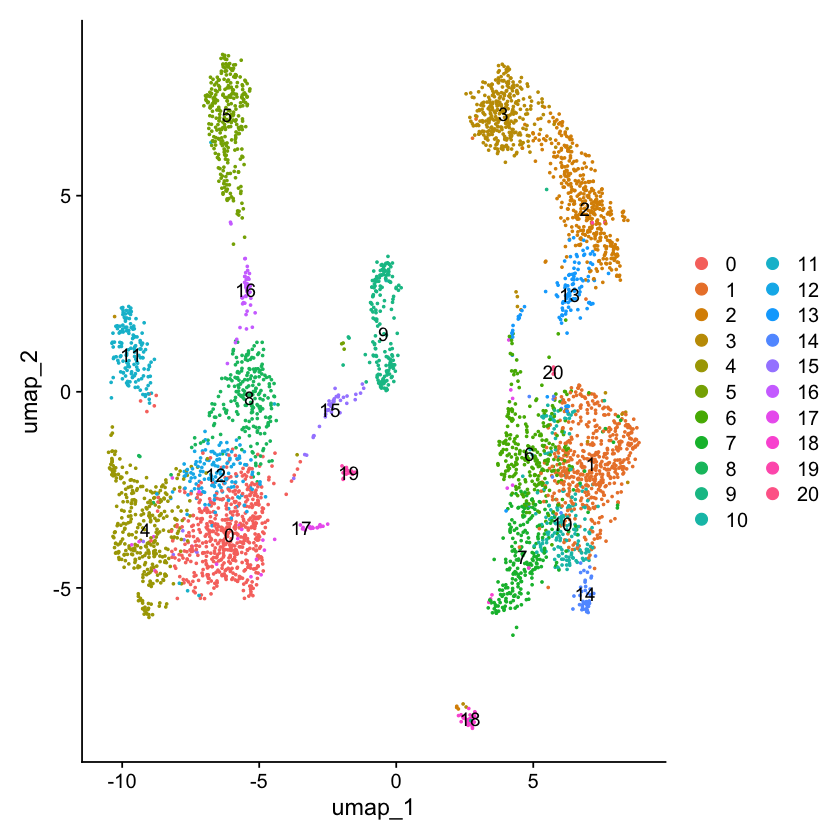

In [16]:
library(ggplot2)

seurat_obj <- SetIdent(seurat_obj, value = "RNA_snn_res.0.9")

p <- DimPlot(combined, reduction = "umap", label = TRUE)
#ggsave(p, filename="./out/fig/dimplot_0.1.png")
p


# reducing number cells randomly just for demo purpose

In [19]:
immune_clusters <- c("5")
seurat_obj$immune_status <- ifelse(
  seurat_obj$seurat_clusters %in% immune_clusters,
  "immune cells",
  as.character(seurat_obj$seurat_clusters)
)

In [25]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,CANCER_TYPE,RNA_snn_res.0.1,seurat_clusters,pANN,DFC,percent.mt,RNA_snn_res.0.05,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,RNA_snn_res.0.6,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.9,immune_status
,<chr>,<dbl>,<int>,<chr>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_ACTTTCACATTCTTAC-1,GSM6432703,2234,1318,HGG,2,3,0.00000000,Singlet,7.1620412,2,3,3,3,3,4,5,3,3,3
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_AGCTCTCGTAGCACGA-1,GSM6432703,19626,3921,HGG,4,15,0.42857143,Singlet,2.8941200,4,6,9,11,12,12,12,13,15,15
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_ATCACGAAGTAAGTAC-1,GSM6432703,3245,1718,HGG,0,10,0.07142857,Singlet,3.7904468,1,0,0,0,0,1,1,7,10,10
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_ATCATCTGTGCAGACA-1,GSM6432703,4028,2063,HGG,0,1,0.07142857,Singlet,5.0893744,1,0,0,0,0,2,2,1,1,1
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_ATGGGAGTCATACGGT-1,GSM6432703,6217,2453,HGG,0,7,0.35714286,Singlet,3.4904295,1,0,0,0,0,1,1,7,7,7
GSM6432703_BT2016062_HGG.rds_GSM6432703_BT2016062_ATGTGTGGTAACGACG-1,GSM6432703,4838,1100,HGG,5,11,0.00000000,Singlet,0.7647788,0,7,7,8,8,9,9,10,11,11


In [26]:
Idents(seurat_obj) <- seurat_obj$immune_status

In [27]:
subsample_single <- function(seurat_obj, frac) {
    all_cells <- Cells(seurat_obj)
    total_cells <- length(all_cells)
    num_cells <- max(1, floor(total_cells * frac))
    sampled_cells <- sample(all_cells, size = num_cells, replace = FALSE)
    seurat_subsampled <- subset(seurat_obj, cells = sampled_cells)
    return(seurat_subsampled)
}

In [28]:
seurat_obj <- subsample_single(seurat_obj, 0.30)

In [29]:
table(seurat_obj@meta.data$immune_status)


           0            1           10           11           12           13 
          55           45           17           13           13           10 
          14           15           16           17           18           19 
           4            4            3            4            5            4 
           2            3            4            6            7            8 
          36           36           25           24           21           16 
           9 immune cells 
          13           29 

In [30]:
seurat_obj

An object of class Seurat 
40284 features across 377 samples within 1 assay 
Active assay: RNA (40284 features, 2000 variable features)
 22 layers present: data, counts, scale.data.GSM6432703_BT2016062, scale.data.GSM6432704_BT2018022, scale.data.GSM6432705_P-1190_S-1197, scale.data.GSM6432706_P-1569_S-1569, scale.data.GSM6432723_P-6117_S-8370, scale.data.GSM6432724_P-6166_S-8321, scale.data.GSM6432725_P-6240_S-8628, scale.data.GSM6432730_P-6292_S-8579, scale.data.GSM6432731_P-6308_S-8632, scale.data.GSM6432735_P-6337_S-8821, scale.data.GSM6432737_P-6431_S-8842, scale.data.GSM6432738_P-6519_S-9084, scale.data.GSM6432739_P-6640_S-9581, scale.data.GSM6934152_PA1, scale.data.GSM6934153_PA2, scale.data.GSM6934155_PA4, scale.data.GSM6934156_PA5, scale.data.GSM6934157_PMA1, scale.data.GSM7305263_910, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

In [31]:

# make count matrix from seurat object
matrix <- GetAssayData(seurat_obj,
                       layer = "counts",
                       assay = "RNA") %>%
            as.data.frame()



In [34]:


gene_order <- read.table("./in/inferCNV_inputs/gencode_v19_gene_pos.txt", header = FALSE, sep = "\t", stringsAsFactors = FALSE)
genes_in_counts <- rownames(matrix)
genes_in_order <- gene_order$V1

common_genes <- intersect(genes_in_counts, genes_in_order)
matrix <- matrix[common_genes, ]

write.table(matrix, 
            file = "./in/inferCNV_inputs/merged_gene_matrix.txt", 
            append = FALSE, 
            sep = "\t", 
            row.names = TRUE, 
            col.names = TRUE)


In [35]:

gene_order <- gene_order[gene_order$V1 %in% common_genes, ]
write.table(
    gene_order,
    file = "./in/inferCNV_inputs/inferCNV_gene_order.txt",
    sep = "\t",
    quote = FALSE,
    col.names = FALSE,
    row.names = FALSE
)



In [36]:


# make annotation with Seurat clusters

annotation <- Idents(seurat_obj) %>% as.matrix()
write.table(annotation, 
            file = "./in/inferCNV_inputs/merged_annotation.txt", 
            append = FALSE, 
            sep = "\t", 
            row.names = TRUE, 
            col.names = FALSE)


gc()



,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,8488470,453.4,15051158,803.9,NA,15051158,803.9
Vcells,90326851,689.2,384024584,2929.9,16384,480020881,3662.3


In [37]:
saveRDS(seurat_obj, "./in/inferCNV_inputs/subsampled_seurat.rds")